In [646]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [647]:
train_path = 'drive/MyDrive/Deep Learning/HW6/train.csv'
test_path = 'drive/MyDrive/Deep Learning/HW6/test.csv'

train_set = pd.read_csv(train_path)
test_set = pd.read_csv(test_path)

In [648]:
train_set.head()

,time,value
0,0,52.483570
1,1,49.352749
2,2,53.314735
3,3,57.711823
4,4,48.934444


In [649]:
train = train_set['value']
test = test_set['value']
train.index = train_set['time']
train.head()
test.index = test_set['time']
test.head()
train = pd.DataFrame(train)
test = pd.DataFrame(test)

In [650]:
train.head()

,value
time,
0,52.483570
1,49.352749
2,53.314735
3,57.711823
4,48.934444


In [651]:
print(train.shape, test.shape)

(1000, 1) (461, 1)


In [652]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
train_sc = scaler.transform(train)
test_sc = scaler.transform(test)


In [653]:
from keras.preprocessing.sequence import TimeseriesGenerator

train_data_gen = TimeseriesGenerator(train_sc, train_sc,
	length=20, sampling_rate=1,stride=1,
    batch_size=10)
test_data_gen = TimeseriesGenerator(test_sc, test_sc,
	length=20, sampling_rate=1,stride=1,
	batch_size=1)

In [654]:
# model = keras.Sequential([
#   keras.layers.Input(shape=(20, 1)),
#   keras.layers.SimpleRNN(32, return_sequences=True),

#   keras.layers.SimpleRNN(64),
#   # keras.layers.Flatten(),

#   keras.layers.Dense(128),
#   keras.layers.Dense(1)
# ])
inputs = keras.layers.Input(shape=(20, 1))
rnn_out = keras.layers.SimpleRNN(100)(inputs)
outputs = keras.layers.Dense(1)(rnn_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss=keras.losses.MeanAbsoluteError())
model.summary()

Model: "model_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_68 (InputLayer)        [(None, 20, 1)]           0         
_________________________________________________________________
simple_rnn_99 (SimpleRNN)    (None, 100)               10200     
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [655]:
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)
history = model.fit(
    dataset_train,
    epochs=100,
    validation_data=dataset_test,
    callbacks=[es_callback],
)

Epoch 1/100
96/96 [==============================] - 2s 12ms/step - loss: 0.4126 - val_loss: 0.3001
Epoch 2/100
96/96 [==============================] - 1s 10ms/step - loss: 0.2856 - val_loss: 0.2817
Epoch 3/100
96/96 [==============================] - 1s 10ms/step - loss: 0.2568 - val_loss: 0.2559
Epoch 4/100
96/96 [==============================] - 1s 10ms/step - loss: 0.2520 - val_loss: 0.2562
Epoch 5/100
96/96 [==============================] - 1s 10ms/step - loss: 0.2531 - val_loss: 0.2762
Epoch 6/100
96/96 [==============================] - 1s 10ms/step - loss: 0.2505 - val_loss: 0.2583
Epoch 7/100
96/96 [==============================] - 1s 10ms/step - loss: 0.2475 - val_loss: 0.2763
Epoch 8/100
96/96 [==============================] - 1s 11ms/step - loss: 0.2471 - val_loss: 0.2767


In [656]:
print('mean absolute error: {mae}'.format(mae = model.evaluate(train_data_gen)))

98/98 [==============================] - 0s 2ms/step - loss: 0.0447
mean absolute error: 0.0446900799870491


In [657]:
print('mean absolute error: {mae}'.format(mae = model.evaluate(test_data_gen)))

441/441 [==============================] - 1s 2ms/step - loss: 0.0467
mean absolute error: 0.046655360609292984


In [660]:
pred = scaler.inverse_transform(model.predict(test_data_gen))

In [661]:
pred.shape
true = np.array(test[20:]).reshape(-1,1)

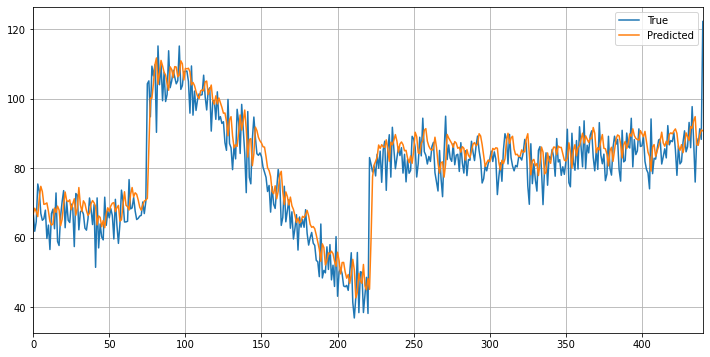

In [662]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(true, label= 'True')
plt.plot(pred, label = 'Predicted')
plt.legend()
plt.show()

In [663]:
from keras.preprocessing.sequence import TimeseriesGenerator

train_data_gen = TimeseriesGenerator(train_sc, train_sc,
	length=40, sampling_rate=1,stride=1,
    batch_size=10)
test_data_gen = TimeseriesGenerator(test_sc, test_sc,
	length=40, sampling_rate=1,stride=1,
	batch_size=1)

In [664]:
# model = keras.Sequential([
#   keras.layers.Input(shape=(20, 1)),
#   keras.layers.SimpleRNN(32, return_sequences=True),

#   keras.layers.SimpleRNN(64),
#   # keras.layers.Flatten(),

#   keras.layers.Dense(128),
#   keras.layers.Dense(1)
# ])
inputs = keras.layers.Input(shape=(None, 1))
rnn_out = keras.layers.SimpleRNN(100)(inputs)
outputs = keras.layers.Dense(1)(rnn_out)

model = keras.Model(inputs=inputs, outputs=outputs)
model.compile(optimizer=keras.optimizers.Adam(learning_rate=learning_rate), loss=keras.losses.MeanAbsoluteError())
model.summary()

Model: "model_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_69 (InputLayer)        [(None, None, 1)]         0         
_________________________________________________________________
simple_rnn_100 (SimpleRNN)   (None, 100)               10200     
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 101       
Total params: 10,301
Trainable params: 10,301
Non-trainable params: 0
_________________________________________________________________


In [665]:
es_callback = keras.callbacks.EarlyStopping(monitor="val_loss", min_delta=0, patience=5)
history = model.fit(
    dataset_train,
    epochs=100,
    validation_data=dataset_test,
    callbacks=[es_callback],
)

Epoch 1/100
96/96 [==============================] - 2s 11ms/step - loss: 0.5721 - val_loss: 0.4001
Epoch 2/100
96/96 [==============================] - 1s 10ms/step - loss: 0.3118 - val_loss: 0.2680
Epoch 3/100
96/96 [==============================] - 1s 10ms/step - loss: 0.2532 - val_loss: 0.2806
Epoch 4/100
96/96 [==============================] - 1s 10ms/step - loss: 0.2439 - val_loss: 0.2738
Epoch 5/100
96/96 [==============================] - 1s 10ms/step - loss: 0.2464 - val_loss: 0.2887
Epoch 6/100
96/96 [==============================] - 1s 10ms/step - loss: 0.2462 - val_loss: 0.2583
Epoch 7/100
96/96 [==============================] - 1s 11ms/step - loss: 0.2479 - val_loss: 0.2646
Epoch 8/100
96/96 [==============================] - 1s 10ms/step - loss: 0.2445 - val_loss: 0.2951
Epoch 9/100
96/96 [==============================] - 1s 10ms/step - loss: 0.2460 - val_loss: 0.3011
Epoch 10/100
96/96 [==============================] - 1s 10ms/step - loss: 0.2488 - val_loss: 0.2760

In [666]:
print('mean absolute error: {mae}'.format(mae = model.evaluate(train_data_gen)))

96/96 [==============================] - 0s 3ms/step - loss: 0.0435
mean absolute error: 0.04352312162518501


In [667]:
print('mean absolute error: {mae}'.format(mae = model.evaluate(test_data_gen)))

421/421 [==============================] - 1s 2ms/step - loss: 0.0454
mean absolute error: 0.04540471360087395


In [668]:
pred = scaler.inverse_transform(model.predict(test_data_gen))

In [669]:
pred.shape
true = np.array(test[40:]).reshape(-1,1)

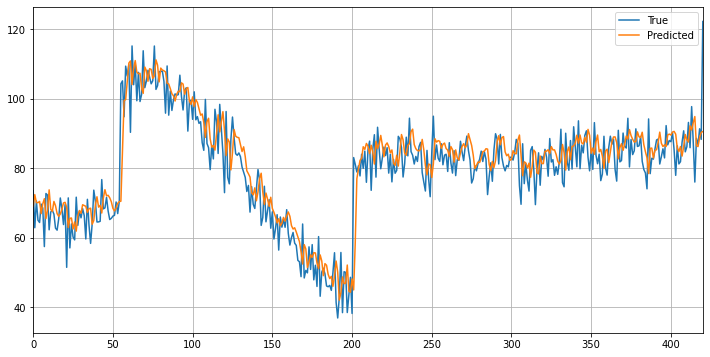

In [670]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(true, label= 'True')
plt.plot(pred, label = 'Predicted')
plt.legend()
plt.show()